In [1]:
import numpy as np
from PIL import Image
from PIL import ImageFilter
from tqdm.notebook import tqdm

# Images

In [13]:
image1 = Image.open('river.jpg')
image2 = Image.open('Broadway_tower_edit.jpg')
image3 = Image.open('field.png')

images_C = [image1, image2, image3]
images_L = [image1.convert ('L'), image2.convert ('L'), image3.convert ('L')]


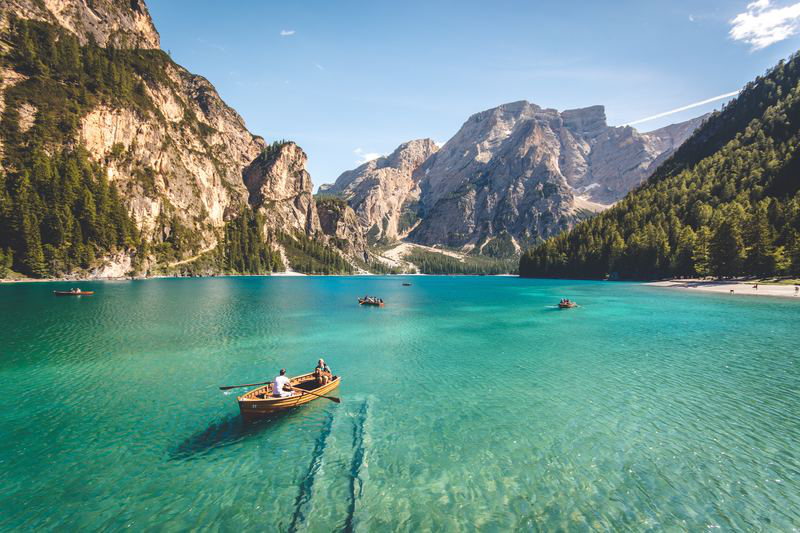

In [14]:
image1

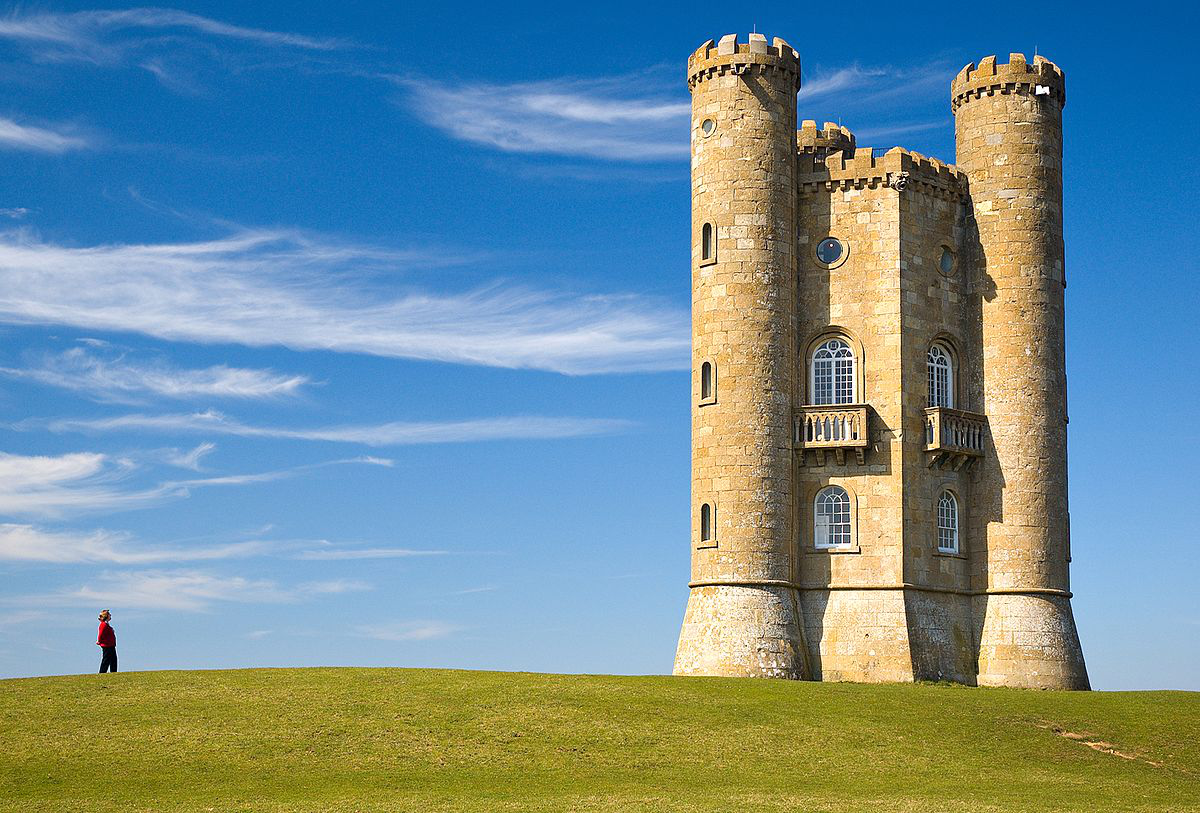

In [15]:
image2

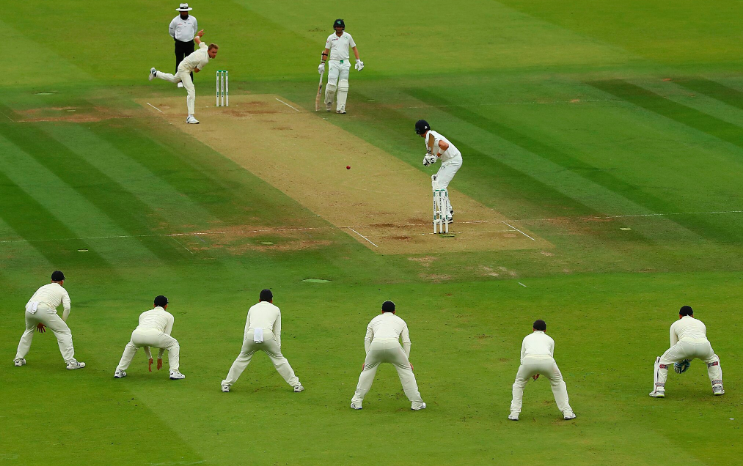

In [16]:
image3

# Seam Carving Implementation

In [55]:
class SeamCarving:
    def __init__(self):
        pass
    
    def normalize(self, image_array):
        return ((image_array / np.max(image_array)) * 255).astype('int64')
    
    def changeType(self, image, dest="array"):
        if dest == "array":
            if type(image) == Image.Image:
                return np.array(image).astype('int64')
            return image.astype('int64')
        else:
            if type(image) != Image.Image:
                return self.toImage(image)
            return image
    
    def toImage(self, image_array, mode='L'):
        return Image.fromarray(image_array.astype('uint8'), mode=mode)
            

    def detectEdge(self, image, inbuilt=False):
        image = self.changeType(image, "image")
    
        if inbuilt:
            return np.array(image.filter(ImageFilter.FIND_EDGES))
        kx = np.array([
            [-0.125, 0, 0.125],
            [-0.25, 0, 0.25],
            [-0.125, 0, 0.125]
        ])
    #     kx = 8 * kx
        ky = kx.T

    #     print(kx)
    #     print(ky)

        scale = int(8 * np.sqrt(2))



        ex = image.filter(ImageFilter.Kernel((3,3), kx.flatten(), 1, 0))
        ey = image.filter(ImageFilter.Kernel((3,3), ky.flatten(), 1, 0))

        e = (scale * np.sqrt(np.array(ex) ** 2 + np.array(ey)** 2)).astype('int64')

        return e
    
    
    def drawSeam(self, image_array, seam):
        a = self.changeType(image_array, "array")
        r = len(seam)
        a[np.arange(r), seam] = 255
        return a
    
    def getAndDrawSeam(self, image_array):
        image_array = self.changeType(image_array, "array")
        seam = self.getSeam(image_array)
        return self.drawSeam(image_array, seam)
        
    
    def getSeam(self, image_array):
        image_array = self.changeType(image_array, "array")
#         print(type(image_array))
        e = self.detectEdge(self.toImage(image_array), inbuilt=False)
        m, d = self.getDp(e)
        r, c = image_array.shape
        seam = np.zeros((r)).astype('int')
        start = np.argmin(m[0])
#         print(start)
        seam[0] = start
        for i in range(1, r):
            seam[i] = seam[i - 1] + d[i - 1][seam[i - 1]]
        return seam
    
    
    def resizeImage(self, image_array, value=5):
        image_array = self.changeType(image_array, "array")
        r, c = image_array.shape
        value = min(value, c - 100)

        _image_array = image_array.copy()

        for i in tqdm(range(value)):

    #         e = detectEdge(toImage(_image_array), inbuilt=True).astype('int64')
    #         m, d = getDp(e)

            seam = self.getSeam(_image_array)

            _image_array = self.removeSeam(_image_array, seam)

        return _image_array
    
    
    def getDp(self, image_array):
        image_array = self.changeType(image_array, "array")
        r, c = image_array.shape
        m = np.zeros((r, c), dtype='int64')
        d = np.zeros((r, c), dtype='int64')
        m[-1] = image_array[-1][:]

        for i in range(r - 2, -1, -1):
            for j in range(c):
                left, center, right = np.inf, m[i + 1][j], np.inf
                if j > 0:
                    left = m[i + 1][j - 1]
                if j < c - 1:
                    right = m[i + 1][j + 1]
                temp = [left, center, right]
                index = temp.index(min(temp))

        #         print(temp[index])

                m[i][j] = image_array[i][j] + temp[index]

                d[i][j] = index - 1
        return m, d
    


    
    
    def removeSeam(self, image_array, seam):
        image_array = self.changeType(image_array, "array")
        r, c = image_array.shape
        new_array = np.zeros((r, c - 1))

        for i in range(r):
    #         print(i)
            p = seam[i]
    #         print(i, p, new_array.shape, image_array.shape)
            if p == 0:
                new_array[i] = image_array[i, 1:c].copy()
                continue
            if p == c - 1:
                new_array[i] = image_array[i, 0:c - 1].copy()
                continue
            new_array[i, 0:p] = image_array[i, 0:p].copy()
            new_array[i, p: c - 1] = image_array[i, p + 1: c].copy()
        return new_array

    

sc = SeamCarving()

# Visualizing seam

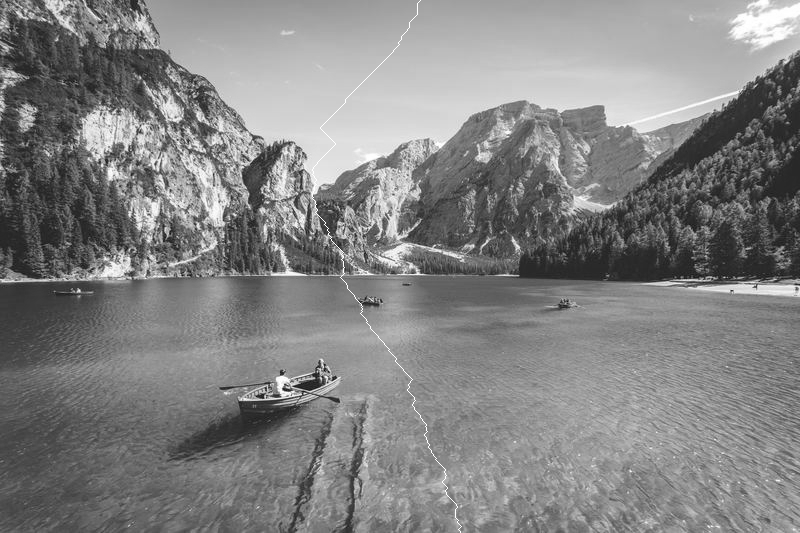

In [30]:
sc.toImage(sc.getAndDrawSeam(images_L[0]))

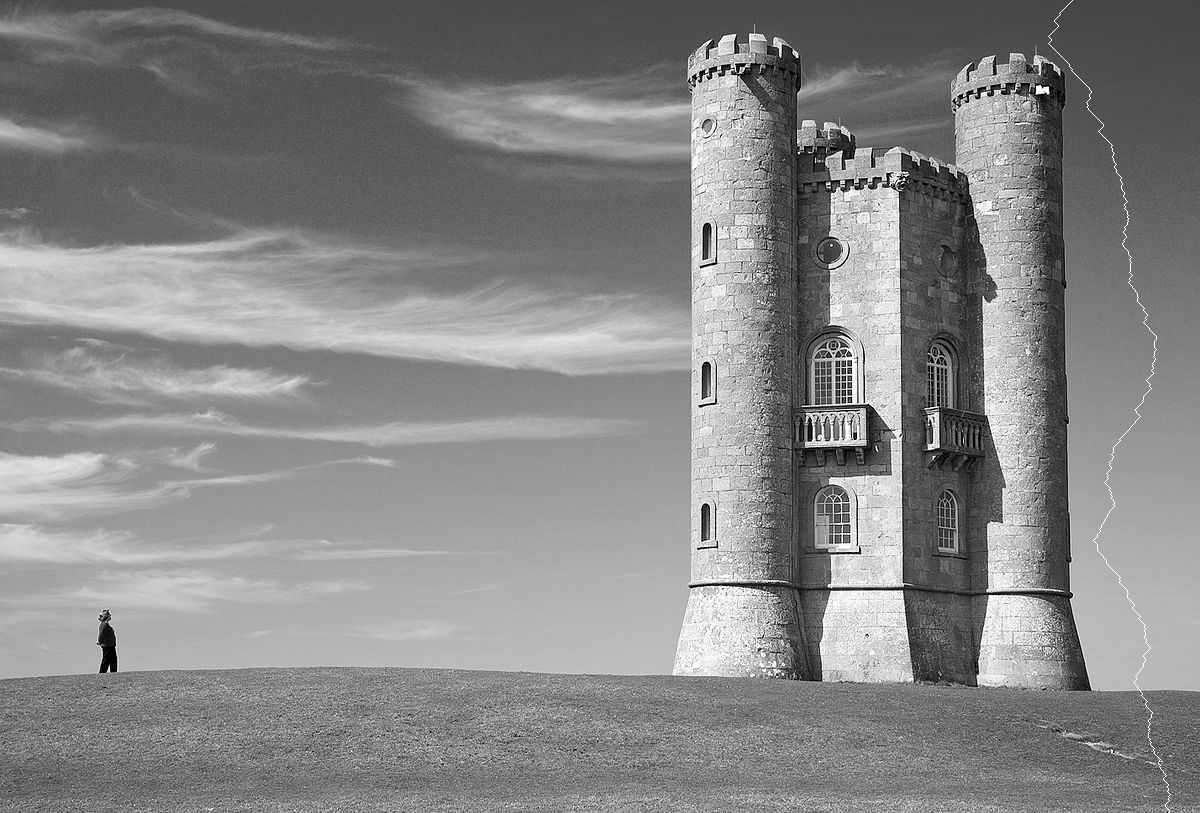

In [34]:
sc.toImage(sc.getAndDrawSeam(images_L[1]))

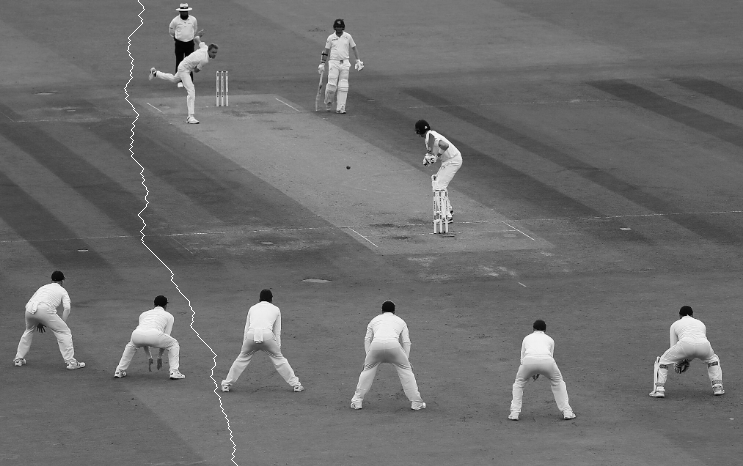

In [33]:
sc.toImage(sc.getAndDrawSeam(images_L[2]))

# visualizing energy path 

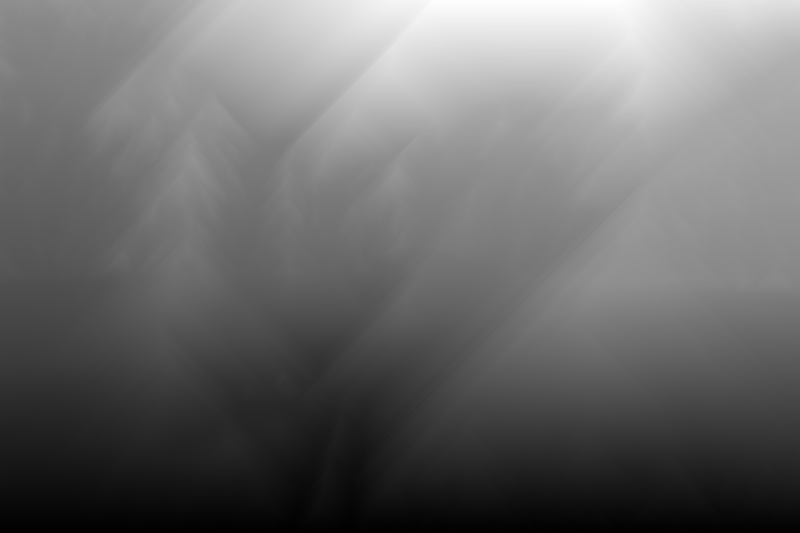

In [47]:
sc.toImage(sc.normalize(sc.getDp(images_L[0])[0]))

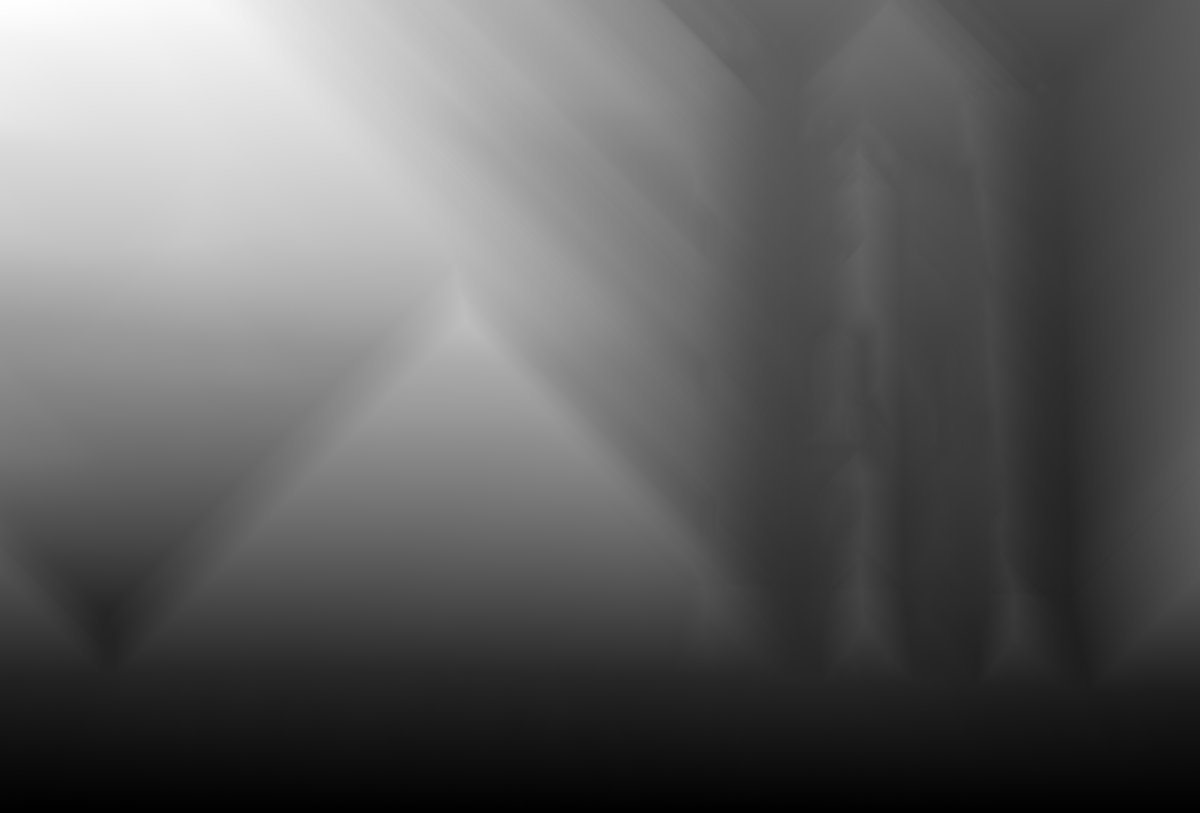

In [48]:
sc.toImage(sc.normalize(sc.getDp(images_L[1])[0]))

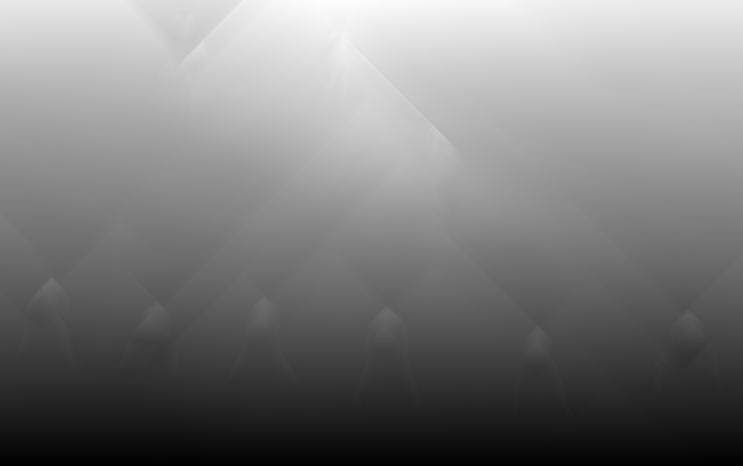

In [49]:
sc.toImage(sc.normalize(sc.getDp(images_L[2])[0]))

# resize 150 px smaller

In [57]:
L1 = sc.resizeImage(images_L[0], 150)

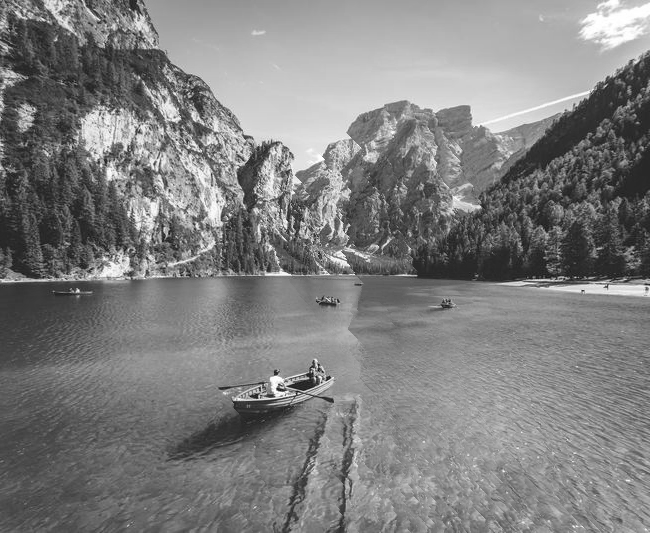

In [63]:
sc.toImage(L1)

In [66]:
L2 = sc.resizeImage(images_L[1], 150)

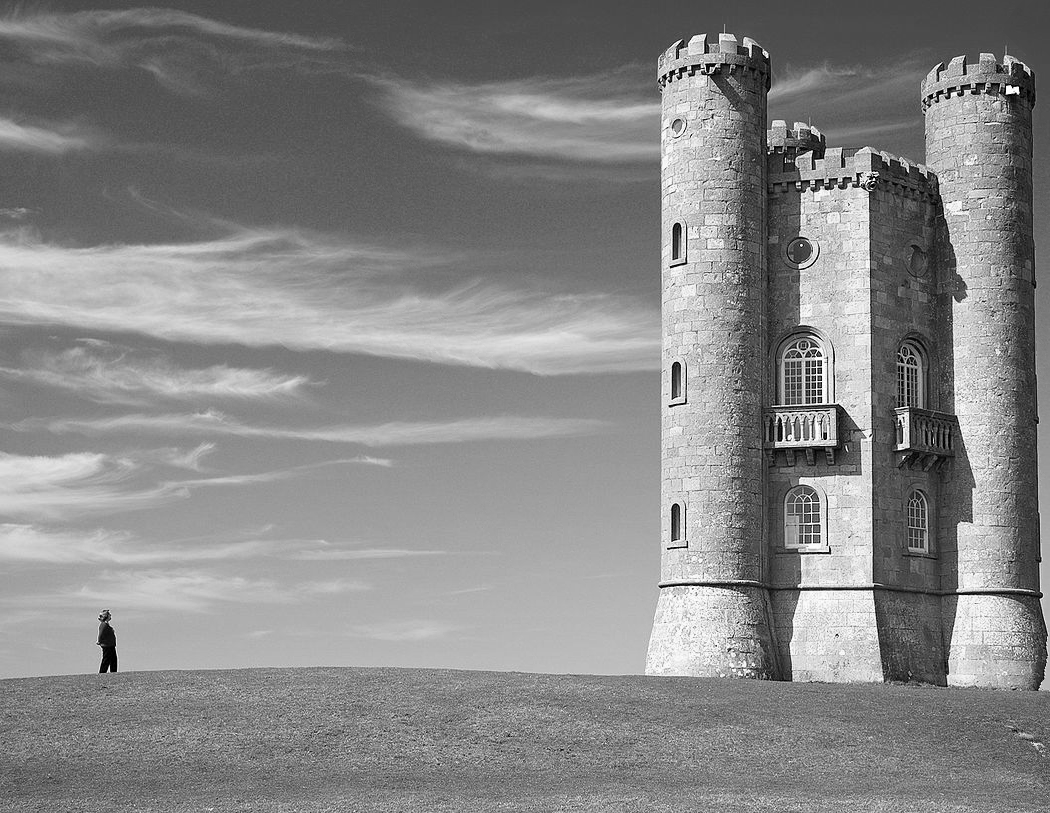

In [69]:
sc.toImage(L2)

In [72]:
L3 = sc.resizeImage(images_L[2], 100)

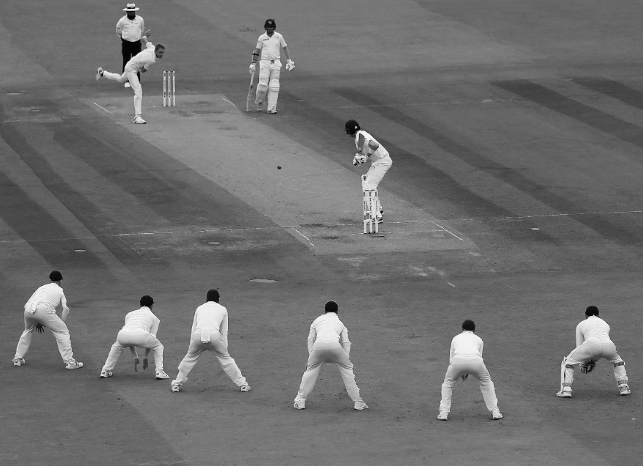

In [77]:
sc.toImage(L3)